## Завдання 2: предикт LTV користувача
#### Розрахуй фактичний LTV користувачів та побудуй предикт на рік на основі тижневих когорт на прикріпленому семплі даних. Побудуй візуалізацію кривих предиктового та фактичного LTV. Опиши обраний підхід та оціни якість побудованої моделі, запропонуй варіанти, як можна покращити точність предикту.

### Опис колонок
* user_id — ідентифікатор користувач¡
* event_timestamp — дата та час здійснення користувачем покупк
* first_purchase_time — дата та час здійснення користувачем першої покупк
* cohort_week — когорта користувача, дата початку календарного тижн
* lifetime_weeks — тривалість життя користувача на момент конкретної події у тижня
* product_id — ідектифікатор підпсики, купленої користувачем. Містить в собі інформацію про вартість та тривалість підписки

#### Імпортуемо бібліотеки та читаємо таблицю

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzFysXUE2NZrHW9sivf3lxlEoUK2xNYwEe0EnmTmkI8JSopi7D8sywmbfLWQQRCW1yBrnE25kSFHU_/pub?gid=0&single=true&output=csv')

In [8]:
df.head(10)

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,product_id
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 9:54:02,2023-10-13 9:54:02,2023-10-08,0,weekly.2.49
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 4:45:14,2023-03-25 4:44:40,2023-03-19,29,weekly.2.49
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 4:44:40,2023-03-25 4:44:40,2023-03-19,0,weekly.2.49
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 4:44:16,2023-03-25 4:44:40,2023-03-19,1,weekly.2.49
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 4:45:55,2023-03-25 4:44:40,2023-03-19,2,weekly.2.49
5,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-17 16:58:31,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49
6,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-17 22:58:49,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49
7,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-18 22:58:40,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49
8,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-22 4:43:53,2023-03-25 4:44:40,2023-03-19,4,weekly.2.49
9,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-29 4:43:52,2023-03-25 4:44:40,2023-03-19,5,weekly.2.49


#### Перевіряємо які є значення у колонці "product_id"


In [9]:
df.product_id.unique()

array(['weekly.2.49'], dtype=object)

#### Чистка даних

In [10]:
df.isnull().sum()

user_id                0
event_timestamp        0
first_purchase_time    0
cohort_week            0
lifetime_weeks         0
product_id             0
dtype: int64

In [11]:
df.duplicated().sum()

3

In [16]:
df[df.duplicated()]

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,product_id
2246,bdbb48be-217a-4e4c-87f4-07fcb8b84b1f,2023-04-22 16:13:43,2023-04-22 16:12:42,2023-04-16,0,weekly.2.49
4062,f1098763-6704-4788-82e9-98b09efa8d2b,2023-04-26 16:48:17,2023-04-26 16:48:12,2023-04-23,0,weekly.2.49
5935,61db907c-01c4-4b16-9a1e-b8632257fd15,2023-06-21 17:07:26,2023-06-21 17:07:26,2023-06-18,0,weekly.2.49


In [17]:
df.head()

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,product_id
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 9:54:02,2023-10-13 9:54:02,2023-10-08,0,weekly.2.49
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 4:45:14,2023-03-25 4:44:40,2023-03-19,29,weekly.2.49
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 4:44:40,2023-03-25 4:44:40,2023-03-19,0,weekly.2.49
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 4:44:16,2023-03-25 4:44:40,2023-03-19,1,weekly.2.49
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 4:45:55,2023-03-25 4:44:40,2023-03-19,2,weekly.2.49


#### Створюемо нову колонку для зручності підрахунку (product_cost)

In [18]:
df['product_cost'] = 2.49

In [19]:
df.head(10)

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,product_id,product_cost
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 9:54:02,2023-10-13 9:54:02,2023-10-08,0,weekly.2.49,2.49
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 4:45:14,2023-03-25 4:44:40,2023-03-19,29,weekly.2.49,2.49
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 4:44:40,2023-03-25 4:44:40,2023-03-19,0,weekly.2.49,2.49
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 4:44:16,2023-03-25 4:44:40,2023-03-19,1,weekly.2.49,2.49
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 4:45:55,2023-03-25 4:44:40,2023-03-19,2,weekly.2.49,2.49
5,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-17 16:58:31,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49,2.49
6,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-17 22:58:49,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49,2.49
7,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-18 22:58:40,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49,2.49
8,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-22 4:43:53,2023-03-25 4:44:40,2023-03-19,4,weekly.2.49,2.49
9,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-29 4:43:52,2023-03-25 4:44:40,2023-03-19,5,weekly.2.49,2.49


#### Групуємо за користувачами та рахуємо суму витрачену на підкиски користувачами

In [20]:
df.groupby('user_id').agg({'product_cost': 'sum'})

,product_cost
user_id,
00026e14-e302-4772-b691-8b0e67ab0c32,49.80
0047993c-3cff-4ab4-a34a-e376f823c282,2.49
00f7a8b6-9dd5-4806-bc31-69c8bc68bb24,2.49
0124f243-d4d0-4971-b997-1e6b79c866f0,7.47
0126e40c-da09-4e28-b687-457716e6ccfd,2.49
...,...
fec8b6a1-1bfc-49af-bc87-69679149945f,2.49
fee872ce-acb6-4c1d-ab31-c817b5867577,2.49
feeca102-8532-458d-bb51-7883f3f9a761,17.43


In [21]:
df.groupby('user_id').agg({'product_cost': 'sum'}).reset_index()

,user_id,product_cost
0,00026e14-e302-4772-b691-8b0e67ab0c32,49.80
1,0047993c-3cff-4ab4-a34a-e376f823c282,2.49
2,00f7a8b6-9dd5-4806-bc31-69c8bc68bb24,2.49
3,0124f243-d4d0-4971-b997-1e6b79c866f0,7.47
4,0126e40c-da09-4e28-b687-457716e6ccfd,2.49
...,...,...
929,fec8b6a1-1bfc-49af-bc87-69679149945f,2.49
930,fee872ce-acb6-4c1d-ab31-c817b5867577,2.49
931,feeca102-8532-458d-bb51-7883f3f9a761,17.43
932,ff9a70ec-9962-4378-9fab-011780499257,39.84


#### Рахуемо сумарну кількість та округлюємо її

In [23]:
round(df.product_cost.sum(),2)

15154.14

#### Наразі зрозуміло логіку кагорт та як вони поділені (Когорта - це частина аудиторії, яка виконала певну дію у заданий період часу) 7 днів

In [24]:
df.cohort_week.min()

'2023-02-26'

In [25]:
df.cohort_week.max()

'2023-10-08'

In [26]:
df.cohort_week.unique()

array(['2023-10-08', '2023-03-19', '2023-05-14', '2023-06-11',
       '2023-07-09', '2023-06-04', '2023-05-21', '2023-04-23',
       '2023-03-26', '2023-03-05', '2023-04-09', '2023-04-02',
       '2023-05-07', '2023-02-26', '2023-09-17', '2023-04-16',
       '2023-03-12', '2023-08-20', '2023-04-30', '2023-08-13',
       '2023-05-28', '2023-09-24', '2023-07-23', '2023-09-03',
       '2023-07-02', '2023-07-30', '2023-09-10', '2023-07-16',
       '2023-08-27', '2023-06-25', '2023-06-18', '2023-08-06'],
      dtype=object)

In [18]:
df[df.user_id == '95287b91-85af-4174-9986-aeafb3853bb6']

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,product_id,product_cost
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 4:45:14,2023-03-25 4:44:40,2023-03-19,29,weekly.2.49,2.49
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 4:44:40,2023-03-25 4:44:40,2023-03-19,0,weekly.2.49,2.49
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 4:44:16,2023-03-25 4:44:40,2023-03-19,1,weekly.2.49,2.49
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 4:45:55,2023-03-25 4:44:40,2023-03-19,2,weekly.2.49,2.49
5,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-17 16:58:31,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49,2.49
6,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-17 22:58:49,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49,2.49
7,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-18 22:58:40,2023-03-25 4:44:40,2023-03-19,3,weekly.2.49,2.49
8,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-22 4:43:53,2023-03-25 4:44:40,2023-03-19,4,weekly.2.49,2.49
9,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-29 4:43:52,2023-03-25 4:44:40,2023-03-19,5,weekly.2.49,2.49
10,95287b91-85af-4174-9986-aeafb3853bb6,2023-05-06 4:45:45,2023-03-25 4:44:40,2023-03-19,6,weekly.2.49,2.49


#### Перневіряємо який тип даних у Датафреймі 

In [28]:
df.dtypes

user_id                 object
event_timestamp         object
first_purchase_time     object
cohort_week             object
lifetime_weeks           int64
product_id              object
product_cost           float64
dtype: object

#### Групуємо по Когортам та візуалізуємо сумму покупок

In [29]:
df_cohort_revenue = df.groupby('cohort_week').agg({'product_cost': 'sum'}).reset_index()

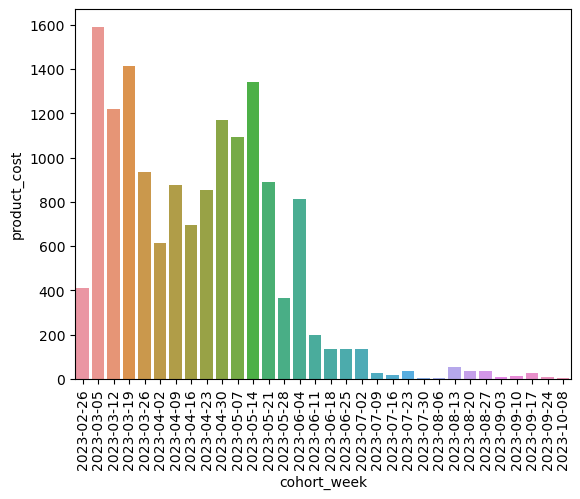

In [30]:
sns.barplot(data = df_cohort_revenue, x = 'cohort_week', y = 'product_cost')
plt.xticks(rotation=90)

plt.show()

#### Для зручности міняемо тип данних та преводимо його в інший формат ('month', 'day' )

In [31]:
df_cohort_revenue.cohort_week = pd.to_datetime(df_cohort_revenue.cohort_week)

df_cohort_revenue['month'] = df_cohort_revenue.cohort_week.dt.month
df_cohort_revenue['day'] = df_cohort_revenue.cohort_week.dt.day

In [34]:
df_cohort_revenue.head()

,cohort_week,product_cost,month,day
0,2023-02-26,408.36,2,26
1,2023-03-05,1591.11,3,5
2,2023-03-12,1217.61,3,12
3,2023-03-19,1411.83,3,19
4,2023-03-26,933.75,3,26


#### За допомогою лінийной регресії побудуемо модель  новчимо її прогнозувати та предбачувати продаж підписок

In [37]:
x = df_cohort_revenue[['month', 'day']]
y = df_cohort_revenue.product_cost

In [38]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [39]:
model.predict(x)

array([1135.41887937, 1174.9465657 , 1096.53914282, 1018.13171993,
        939.72429705, 1012.85516461,  934.44774173,  856.04031885,
        777.63289596,  699.22547308,  761.15528023,  682.74785735,
        604.34043446,  525.93301158,  599.06387914,  520.65645626,
        442.24903338,  363.84161049,  425.77141764,  347.36399476,
        268.95657188,  190.54914899,  112.14172611,  185.27259367,
        106.86517079,   28.45774791,  -49.94967498,   23.18119258,
        -55.2262303 , -133.63365318, -212.04107606, -228.5186918 ])

In [40]:
df_cohort_revenue['predicted'] = model.predict(x)

In [41]:
df_cohort_revenue[df_cohort_revenue.predicted < 0]

,cohort_week,product_cost,month,day,predicted
26,2023-08-27,34.86,8,27,-49.949675
28,2023-09-10,14.94,9,10,-55.226230
29,2023-09-17,24.90,9,17,-133.633653
30,2023-09-24,9.96,9,24,-212.041076
31,2023-10-08,2.49,10,8,-228.518692


In [33]:
df_cohort_revenue

,cohort_week,product_cost,month,day,predicted
0,2023-02-26,408.36,2,26,1135.418879
1,2023-03-05,1591.11,3,5,1174.946566
2,2023-03-12,1217.61,3,12,1096.539143
3,2023-03-19,1411.83,3,19,1018.131720
4,2023-03-26,933.75,3,26,939.724297
5,2023-04-02,612.54,4,2,1012.855165
6,2023-04-09,873.99,4,9,934.447742
7,2023-04-16,697.20,4,16,856.040319
8,2023-04-23,854.07,4,23,777.632896
9,2023-04-30,1167.81,4,30,699.225473


#### Зачищаэмо результат від відємных значень та округлюємо їх і добавляємо до таблиці

In [43]:
df_cohort_revenue['predicted'] = df_cohort_revenue['predicted'].apply(lambda x: max(x, 0))

In [44]:
df_cohort_revenue['predicted'] = round(df_cohort_revenue['predicted'], 2)

In [45]:
df_cohort_revenue = df_cohort_revenue.rename(columns={'predicted': 'LinearRegression'})

In [46]:
df_cohort_revenue.head()

,cohort_week,product_cost,month,day,LinearRegression
0,2023-02-26,408.36,2,26,1135.42
1,2023-03-05,1591.11,3,5,1174.95
2,2023-03-12,1217.61,3,12,1096.54
3,2023-03-19,1411.83,3,19,1018.13
4,2023-03-26,933.75,3,26,939.72


#### З використанням лінійної регресії видно що вона не дуже справляеться с задачою та  передбачує значення дуже неточно майже навпопад. 
#### Наступним кроком буде спроба використання поліноміальних ознаки для моделювання залежності між незалежними змінними

In [47]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

#### Це кусок коду створює модель поліноміальної регресії ступеня 5 та оцінює її точність за допомогою коефіцієнту детермінації (R^2).
#### R^2 показує, наскільки добре модель відповідає даним, і знаходиться в діапазоні від 0 до 1, де 1 означає ідеальне відповідності даним, а 0 - відсутність відповідност

In [49]:
y_pred = model.predict(x_poly)

In [50]:
r2_score(y_pred, y)

0.9030778235218346

#### За допомогою циклу споробуємо покращити значення R^2 змінюючи степень

In [51]:
for i in range(2, 11):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    
    y_pred = model.predict(x_poly)
    
    print(f'{i} -> {r2_score(y_pred, y)}')

2 -> 0.5553086983825388
3 -> 0.730064730658314
4 -> 0.7954050268037156
5 -> 0.9030778235218346
6 -> 0.9196890645271687
7 -> 0.9999999999999543
8 -> 1.0
9 -> 1.0
10 -> 0.9999999978728885


#### Важаю найкращим результатом  степень 4 при якій модель паказуе доволі хороший результат і прі цьму модель не є перенавчена


In [52]:
df_cohort_revenue.head()

,cohort_week,product_cost,month,day,LinearRegression
0,2023-02-26,408.36,2,26,1135.42
1,2023-03-05,1591.11,3,5,1174.95
2,2023-03-12,1217.61,3,12,1096.54
3,2023-03-19,1411.83,3,19,1018.13
4,2023-03-26,933.75,3,26,939.72


In [53]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
    
y_pred = model.predict(x_poly)

In [54]:
y_pred

array([ 480.65985301, 1336.40320332, 1391.65396282, 1105.09495844,
        934.01869026,  848.91110769, 1196.47010781, 1065.86278659,
        906.64859447, 1004.3927636 ,  840.25612589,  778.38426266,
        628.10781944,  643.83123328,  468.87854682,  476.29775231,
        319.24029711,  244.3775686 ,  211.1421107 ,  222.44043198,
         71.92564633,  -24.89165398,  -16.49509495,   84.25706148,
        -23.73264088,  -93.81246188,  -82.19907715,   -4.46655943,
        -21.39460602,   18.36074868,  150.84977936,   -7.33331831])

#### Зачищаэмо результат від відємных значень та округлюємо їх і добавляємо до таблиці.
#### Також проводимо візуалізацію наскільки точно модель спрогнозувала значення.


In [60]:
df_cohort_revenue['PolyRegression'] = y_pred

In [61]:
df_cohort_revenue['PolyRegression'] = df_cohort_revenue['PolyRegression'].apply(lambda x: max(x, 0))

In [62]:
df_cohort_revenue['PolyRegression'] = round(df_cohort_revenue['PolyRegression'], 2)

In [63]:
df_cohort_revenue.head()

,cohort_week,product_cost,month,day,LinearRegression,PolyRegression
0,2023-02-26,408.36,2,26,1135.42,480.66
1,2023-03-05,1591.11,3,5,1174.95,1336.40
2,2023-03-12,1217.61,3,12,1096.54,1391.65
3,2023-03-19,1411.83,3,19,1018.13,1105.09
4,2023-03-26,933.75,3,26,939.72,934.02


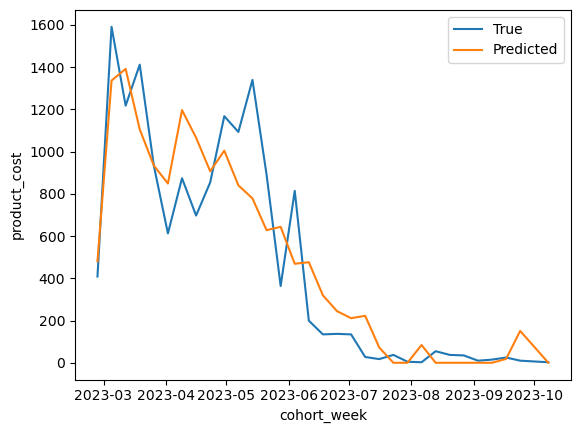

In [68]:
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="product_cost", label='True')
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="PolyRegression", label='Predicted')
plt.show()

#### Добавляємо на діаграму значення з висновку лінійної регресії та бачимо наскільки значееня відрізняються

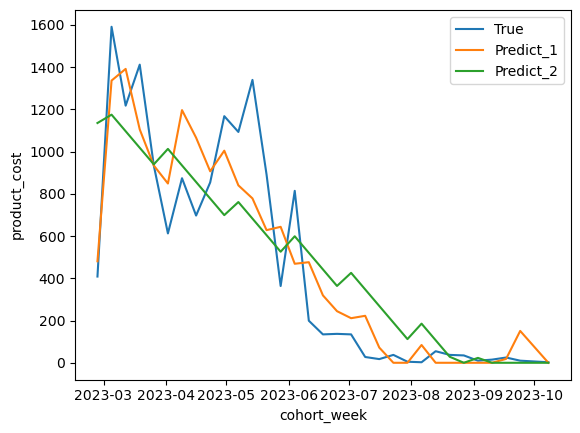

In [69]:
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="product_cost", label='True')
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="PolyRegression", label='Predict_1')
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="LinearRegression", label='Predict_2')
plt.show()

#### На основі поліноміальної регресії створемо візуалізацію та спробуємо предбачити продажі н анаступний рік.Створемо кагорти на наступний рік та спрогнозуємо результат

In [85]:
start_date = '2024-01-01'
end_date = '2024-12-31'

dates = pd.date_range(start=start_date, end=end_date, freq='D')

sundays = dates[dates.dayofweek == 6]

sundays_series = pd.to_datetime(pd.Series(sundays.strftime('%Y-%m-%d')))

sundays_series

0    2024-01-07
1    2024-01-14
2    2024-01-21
3    2024-01-28
4    2024-02-04
5    2024-02-11
6    2024-02-18
7    2024-02-25
8    2024-03-03
9    2024-03-10
10   2024-03-17
11   2024-03-24
12   2024-03-31
13   2024-04-07
14   2024-04-14
15   2024-04-21
16   2024-04-28
17   2024-05-05
18   2024-05-12
19   2024-05-19
20   2024-05-26
21   2024-06-02
22   2024-06-09
23   2024-06-16
24   2024-06-23
25   2024-06-30
26   2024-07-07
27   2024-07-14
28   2024-07-21
29   2024-07-28
30   2024-08-04
31   2024-08-11
32   2024-08-18
33   2024-08-25
34   2024-09-01
35   2024-09-08
36   2024-09-15
37   2024-09-22
38   2024-09-29
39   2024-10-06
40   2024-10-13
41   2024-10-20
42   2024-10-27
43   2024-11-03
44   2024-11-10
45   2024-11-17
46   2024-11-24
47   2024-12-01
48   2024-12-08
49   2024-12-15
50   2024-12-22
51   2024-12-29
dtype: datetime64[ns]

In [86]:
df_next_year = pd.DataFrame({'cohorts': sundays_series,
              'coh_m': sundays_series.dt.month,
              'coh_d': sundays_series.dt.day})

In [87]:
x = df_next_year[['coh_m', 'coh_d']]

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

In [88]:
y_pred = model.predict(x_poly)

In [89]:
df_next_year['Predicted'] = y_pred

In [90]:
df_next_year

,cohorts,coh_m,coh_d,Predicted
0,2024-01-07,1,7,1217.582324
1,2024-01-14,1,14,659.011207
2,2024-01-21,1,21,-208.751016
3,2024-01-28,1,28,-819.234763
4,2024-02-04,2,4,1358.919670
5,2024-02-11,2,11,1400.505751
6,2024-02-18,2,18,931.840806
7,2024-02-25,2,25,511.661368
8,2024-03-03,3,3,1174.990121
9,2024-03-10,3,10,1434.842941


In [91]:
df_next_year['Predicted'] = df_next_year['Predicted'].apply(lambda x: max(x, 0))
df_next_year['Predicted'] = round(df_next_year['Predicted'], 2)

In [92]:
df_next_year


,cohorts,coh_m,coh_d,Predicted
0,2024-01-07,1,7,1217.58
1,2024-01-14,1,14,659.01
2,2024-01-21,1,21,0.00
3,2024-01-28,1,28,0.00
4,2024-02-04,2,4,1358.92
5,2024-02-11,2,11,1400.51
6,2024-02-18,2,18,931.84
7,2024-02-25,2,25,511.66
8,2024-03-03,3,3,1174.99
9,2024-03-10,3,10,1434.84


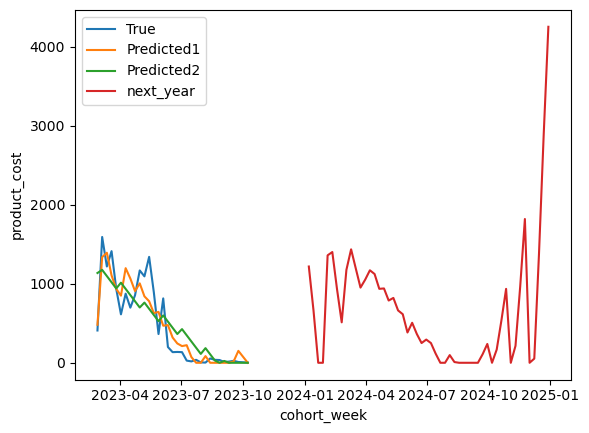

In [93]:
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="product_cost", label='True')
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="PolyRegression", label='Predicted1')
sns.lineplot(data=df_cohort_revenue, x="cohort_week", y="LinearRegression", label='Predicted2')
sns.lineplot(data=df_next_year, x="cohorts", y="Predicted", label='next_year')
plt.show()

#### Модель створена та завізїуалізована!!! Висновком можна сказати що модель робоча але наразі не можливо передбачити продажі пидписок на наступний рік оскількі дуже мало данних стосовно минулого та позаминулого року і не спостерігається тенденція по рокам...